## BREAST CANCER PREDICTION

In [1]:
#IMPORTING ESSENTIAL LIBRARIES  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#loading data 
df=pd.read_csv("Breast_Cancer.csv")

In [3]:
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [4]:
df.shape

(4024, 16)

In [5]:
#Types of columns or features
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [6]:
#Checking number of rows and number of columns
df.shape

(4024, 16)

In [7]:
#Checking null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [8]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [9]:
#Statistical analysis
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [10]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [11]:
print(df['Race'].unique())
print(df['Marital Status'].unique())
print(df['T Stage '].unique())
print(df['N Stage'].unique())
print(df['6th Stage'].unique())
print(df['differentiate'].unique())
print(df['Grade'].unique())
print(df['A Stage'].unique())
print(df['Estrogen Status'].unique())
print(df['Progesterone Status'].unique())

['White' 'Black' 'Other']
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']
['Regional' 'Distant']
['Positive' 'Negative']
['Positive' 'Negative']


In [12]:
# LETS label encode for the categorical features
#convert categorical features in to numerical features
df['Race']=df['Race'].map({'White':1,"Black":2,"Other":3})
df['Marital Status']=df['Marital Status'].map({'Married':1,'Divorced':2,'Single ':3,'Widowed':4,'Separated':5})
df['T Stage ']=df['T Stage '].map({'T1':1,'T2':2,'T3':3,'T4':4})
df['N Stage']=df['N Stage'].map({'N1':1,'N2':2,'N3':3})
df['6th Stage']=df['6th Stage'].map({'IIA':1,'IIIA':2,'IIIC':3,'IIB':4,'IIIB':5})
df['differentiate']=df['differentiate'].map({'Poorly differentiated':1,'Moderately differentiated':2,'Well differentiated':3,
 'Undifferentiated':4})
df['Grade']=df['Grade'].map({'3':3,'2':2,'1':1,' anaplastic; Grade IV':4})
df['A Stage']=df['A Stage'].map({'Regional':1,'Distant':2})
df['Estrogen Status']=df['Estrogen Status'].map({'Positive':1,'Negative':2})
df['Progesterone Status']=df['Progesterone Status'].map({'Positive':1,'Negative':2})

In [13]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,Alive
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,Alive
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,Alive
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,Alive
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,Alive


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

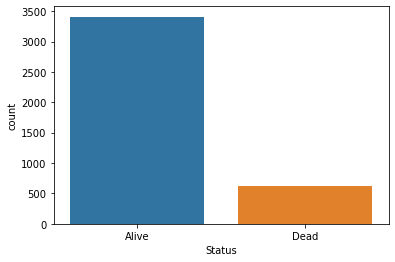

In [14]:
#showing in countplot
sns.countplot(df['Status'])

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['Status']

# 0===ALIVE
# 1===DEAD

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int32

In [16]:
df['Status'].dtypes

dtype('int32')

In [17]:
df['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

In [18]:
#lets Handle with balavced data for Status or Target

df0,df1=df.Status.value_counts()
data_0=df[df['Status']==0]
data_1=df[df['Status']==1]
print(data_1.shape,data_0.shape)

(616, 16) (3408, 16)


In [19]:
#Lets do oversampling method for balancing th data
new_class1=data_1.sample(df0,replace=True)
print(new_class1.shape)
df=pd.concat([data_0,new_class1],axis=0)
df.head()


(3408, 16)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,0
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,0
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,0
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,0
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,0


In [70]:
df.head(5000)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,0
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,0
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,0
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,0
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,54,3,1,2,1,4,2,2,1,41,1,1,21,2,79,1
3985,51,1,1,4,3,3,1,3,1,20,1,1,22,19,78,1
363,51,1,1,2,1,4,2,2,1,30,1,1,2,2,100,1
2533,52,1,3,2,3,3,3,1,1,40,1,1,16,13,58,1


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

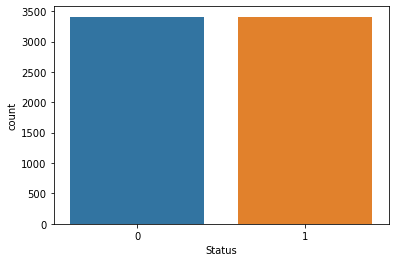

In [20]:
#showing in countplot
sns.countplot(df['Status'])

In [21]:

df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [22]:
x=df.drop('Status',axis=1)
y=df[['Status']]


## Train and Split data

In [23]:
## import Essential Libraries from sklearn for training Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50,stratify=y)

In [25]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4771, 15) (2045, 15) (4771, 1) (2045, 1)


In [26]:
#Let's  normalise and  scale data 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_test

array([[-1.91503613,  3.48039522, -0.68480298, ..., -0.17308609,
        -0.69387093,  0.31486686],
       [-1.15731087, -0.38881284, -0.68480298, ..., -0.17308609,
        -0.69387093,  0.31486686],
       [ 1.33235785, -0.38881284, -0.68480298, ..., -1.65823734,
        -0.69387093, -0.39920259],
       ...,
       [-1.59029674,  3.48039522,  1.23095912, ..., -0.5443739 ,
        -0.69387093,  1.47992753],
       [ 1.11586491, -0.38881284,  0.27307807, ...,  0.07443912,
         1.51193905, -0.02337656],
       [-0.94081794,  1.54579119,  1.23095912, ...,  0.56948954,
        -0.06363951, -0.28645478]])

In [27]:
#LETS check size of imbalanced data
print(df['Status'].value_counts())
print(y.value_counts())

0    3408
1    3408
Name: Status, dtype: int64
Status
0         3408
1         3408
dtype: int64


### SUPPORT VECTOR CLASSIFIER

In [28]:
#SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [29]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

0.8229828850855746
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1023
           1       0.83      0.81      0.82      1022

    accuracy                           0.82      2045
   macro avg       0.82      0.82      0.82      2045
weighted avg       0.82      0.82      0.82      2045

[[856 167]
 [195 827]]


<AxesSubplot:>

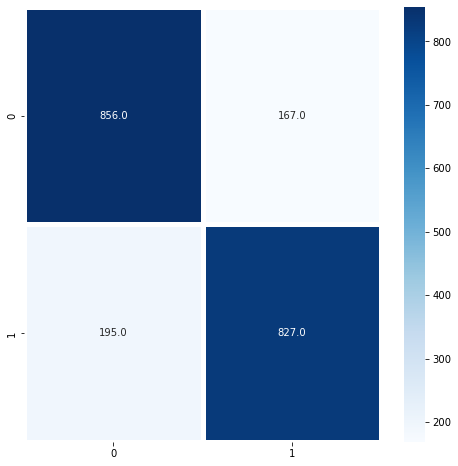

In [30]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

## Logistic Regression

In [31]:
#logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

0.79559902200489
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1023
           1       0.80      0.78      0.79      1022

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045

[[829 194]
 [224 798]]


<AxesSubplot:>

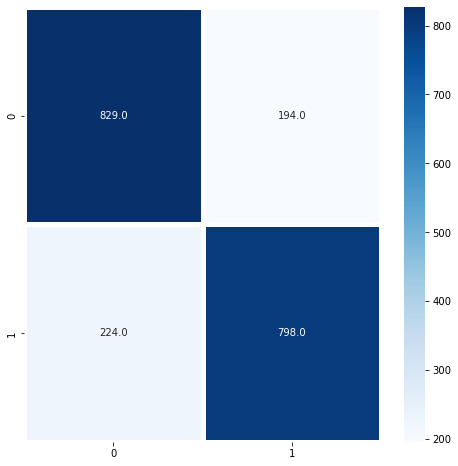

In [33]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

## K NEAREST NEIGHBOURS 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
y_pred=kn.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

0.8249388753056235
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1023
           1       0.78      0.91      0.84      1022

    accuracy                           0.82      2045
   macro avg       0.83      0.82      0.82      2045
weighted avg       0.83      0.82      0.82      2045

[[757 266]
 [ 92 930]]


<AxesSubplot:>

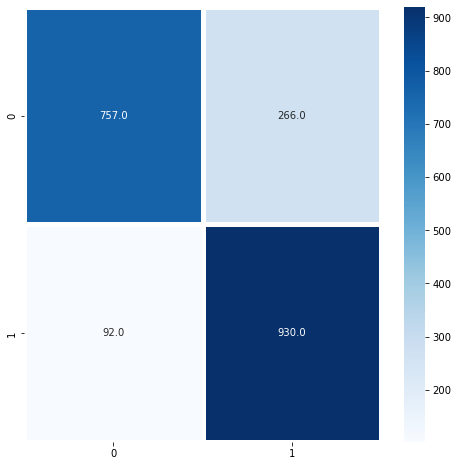

In [36]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

## NAIVE BAYES

In [37]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [38]:
y_pred=naive.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 1, 1])

0.7163814180929096
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1023
           1       0.79      0.59      0.67      1022

    accuracy                           0.72      2045
   macro avg       0.73      0.72      0.71      2045
weighted avg       0.73      0.72      0.71      2045

[[867 156]
 [424 598]]


<AxesSubplot:>

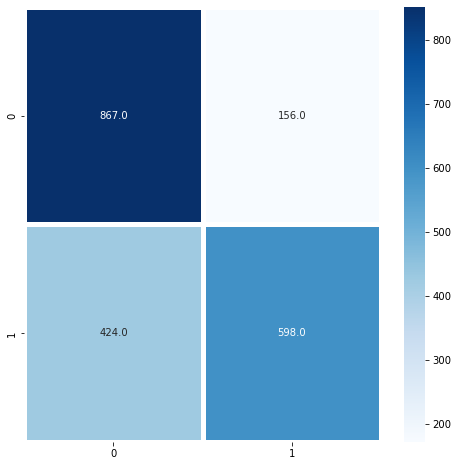

In [39]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

## DECISION TREE

In [41]:
from sklearn.tree   import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini',random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred=dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

0.9119804400977995
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1023
           1       0.86      0.98      0.92      1022

    accuracy                           0.91      2045
   macro avg       0.92      0.91      0.91      2045
weighted avg       0.92      0.91      0.91      2045

[[867 156]
 [ 24 998]]


<AxesSubplot:>

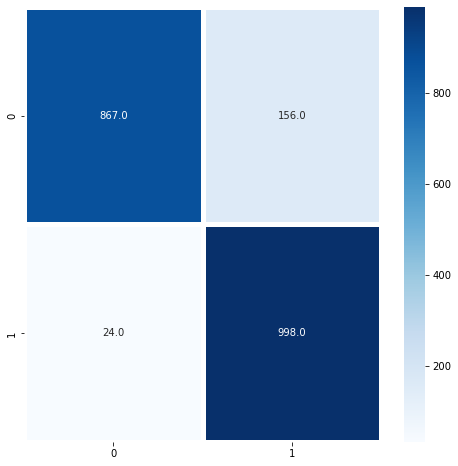

In [43]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

## RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=20,criterion='gini')

In [58]:
rc.fit(x_train, y_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5612\228620636.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=20)

In [59]:
y_pred=rc.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

0.9647921760391198
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1023
           1       0.94      0.99      0.97      1022

    accuracy                           0.96      2045
   macro avg       0.97      0.96      0.96      2045
weighted avg       0.97      0.96      0.96      2045

[[ 957   66]
 [   6 1016]]


<AxesSubplot:>

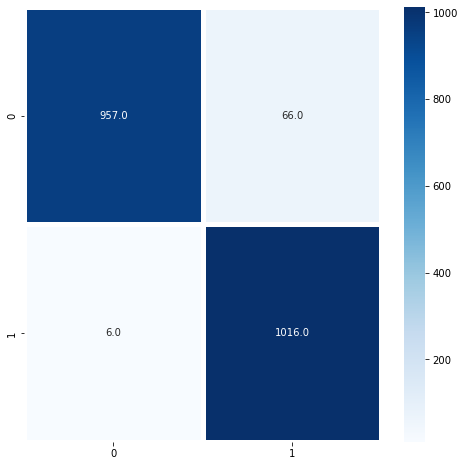

In [60]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

In [61]:
from sklearn.model_selection import cross_val_score
cross_validate=cross_val_score(estimator=rc,X=x_train,y=y_train)
cross_validate

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

array([0.94240838, 0.95702306, 0.95178197, 0.9591195 , 0.96436059])

In [62]:
cross_validate.mean()

0.9549386984534669

In [63]:
#pickle model
import pickle
pickle.dump(rc,open("Breast_cancer.pkl","wb"))
model=pickle.load(open("Breast_cancer.pkl","rb"))


In [72]:
print(model.predict([[54,3,1,2,1,4,2,2,1,41,1,1,21,2,79]]))

[0]


In [65]:
y_pred=model.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[ 957    6]
 [  66 1016]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       963
           1       0.99      0.94      0.97      1082

    accuracy                           0.96      2045
   macro avg       0.96      0.97      0.96      2045
weighted avg       0.97      0.96      0.96      2045



In [53]:
df.Status.value_counts().to_dict()

{0: 3408, 1: 3408}